**DBSCAN**

1. select features
2. covert to np array & change dtypes to float
3. scale
4. cluster/ fit
5. extract labels
6. merge w/ df & explore


`float32 vs float64`
if no need decimals/ converting from int to float > do float32

In [1]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
# after peeking at the original file:
# read text file
# separate by space
# no header
df = pd.read_csv('customers.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# select grocery, milk, fresh to cluster
df = df[["Grocery", "Milk", "Fresh"]]
df.head()

,Grocery,Milk,Fresh
0,7561,9656,12669
1,9568,9810,7057
2,7684,8808,6353
3,4221,1196,13265
4,7198,5410,22615


In [6]:
# df.values will convert each row into a 1D array & whole df into multiple dimension array
#.astype('float32') convert into float
# note since the data came as int, no decimal anyways, so we convert it into float32 
# instead of float64
np_array = df.values.astype("float32", copy = False)
np_array[0:10]

array([[ 7561.,  9656., 12669.],
       [ 9568.,  9810.,  7057.],
       [ 7684.,  8808.,  6353.],
       [ 4221.,  1196., 13265.],
       [ 7198.,  5410., 22615.],
       [ 5126.,  8259.,  9413.],
       [ 6975.,  3199., 12126.],
       [ 9426.,  4956.,  7579.],
       [ 6192.,  3648.,  5963.],
       [18881., 11093.,  6006.]], dtype=float32)

In [7]:
scaler = MinMaxScaler().fit(np_array)
np_array = scaler.transform(np_array)
np_array[0:10]

array([[0.08146416, 0.13072723, 0.11294005],
       [0.10309667, 0.13282411, 0.06289903],
       [0.08278991, 0.11918086, 0.05662161],
       [0.04546386, 0.01553586, 0.11825445],
       [0.07755155, 0.07291369, 0.20162643],
       [0.05521843, 0.11170568, 0.08390699],
       [0.07514793, 0.04280871, 0.10809823],
       [0.10156612, 0.06673203, 0.06755359],
       [0.06670834, 0.04892229, 0.05314406],
       [0.20347716, 0.15029342, 0.05352748]], dtype=float32)

Construct a DBSCAN object with hyperparameter for core point as:

- minimum of 15 data points 
- in a neighborhood of radius 0.5 

In [8]:
dbsc = DBSCAN(eps = .1, min_samples = 20).fit(np_array)
dbsc

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

In [9]:
# Now, let's add the scaled value columns back onto the dataframe
columns = list(df.columns)
scaled_columns = ["Scaled_" + column for column in columns]

# Save a copy of the original dataframe
original_df = df.copy()

# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(np_array, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
df = df.merge(scaled_df, on=df.index)
df = df.drop(columns=['key_0'])

In [10]:
df.head()

,Grocery,Milk,Fresh,Scaled_Grocery,Scaled_Milk,Scaled_Fresh
0,7561,9656,12669,0.081464,0.130727,0.112940
1,9568,9810,7057,0.103097,0.132824,0.062899
2,7684,8808,6353,0.082790,0.119181,0.056622
3,4221,1196,13265,0.045464,0.015536,0.118254
4,7198,5410,22615,0.077552,0.072914,0.201626


In [11]:
# extract labels
labels = dbsc.labels_
labels[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
# seems like all of the data points are in the same cluster
df['labels'] = labels
df.labels.value_counts()

 0    409
-1     31
Name: labels, dtype: int64

In [14]:
df[df.labels==-1]

,Grocery,Milk,Fresh,Scaled_Grocery,Scaled_Milk,Scaled_Fresh,labels
23,22019,36423,26373,0.237300,0.495187,0.235136,-1
39,902,555,56159,0.009690,0.006808,0.500731,-1
45,21531,22044,5181,0.232040,0.299402,0.046171,-1
47,55571,54259,44466,0.598942,0.738042,0.396467,-1
49,28921,21412,4967,0.311694,0.290797,0.044263,-1
56,26866,29892,4098,0.289544,0.406261,0.036514,-1
61,59598,38369,35942,0.642347,0.521684,0.320460,-1
65,45828,20959,85,0.493926,0.284629,0.000731,-1
85,92780,46197,16117,1.000000,0.628270,0.143685,-1
86,32114,73498,22925,0.346109,1.000000,0.204391,-1


In [15]:
# Let's look at the descriptive stats for the entire population, the inliers, then the outliers/anomalies
print("Population")
print(df.describe())
print("-------------")
print("Inliers")
print(df[df.labels==0].describe())
print("-------------")
print("Outliers")
print(df[df.labels==-1].describe())

Population
            Grocery          Milk          Fresh  Scaled_Grocery  Scaled_Milk  \
count    440.000000    440.000000     440.000000      440.000000   440.000000   
mean    7951.277273   5796.265909   12000.297727        0.085671     0.078173   
std     9503.162829   7380.377175   12647.328865        0.102430     0.100491   
min        3.000000     55.000000       3.000000        0.000000     0.000000   
25%     2153.000000   1533.000000    3127.750000        0.023174     0.020124   
50%     4755.500000   3627.000000    8504.000000        0.051225     0.048636   
75%    10655.750000   7190.250000   16933.750000        0.114821     0.097154   
max    92780.000000  73498.000000  112151.000000        1.000000     1.000000   

       Scaled_Fresh      labels  
count    440.000000  440.000000  
mean       0.106977   -0.070455  
std        0.112774    0.256203  
min        0.000000   -1.000000  
25%        0.027863    0.000000  
50%        0.075802    0.000000  
75%        0.150968  

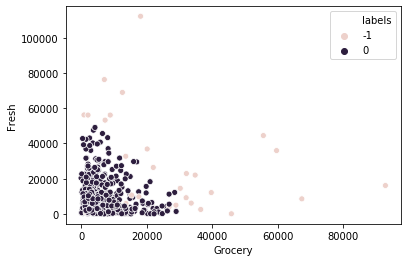

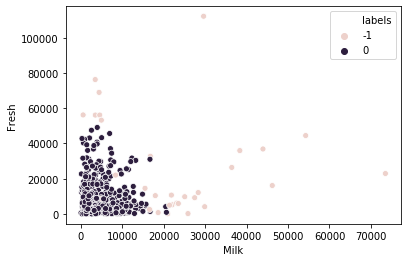

In [16]:
sns.scatterplot(df.Grocery, df.Fresh, hue=df.labels)
plt.show()

sns.scatterplot(df.Milk, df.Fresh, hue=df.labels)
plt.show()

Text(0.5, 0, 'Grocery')

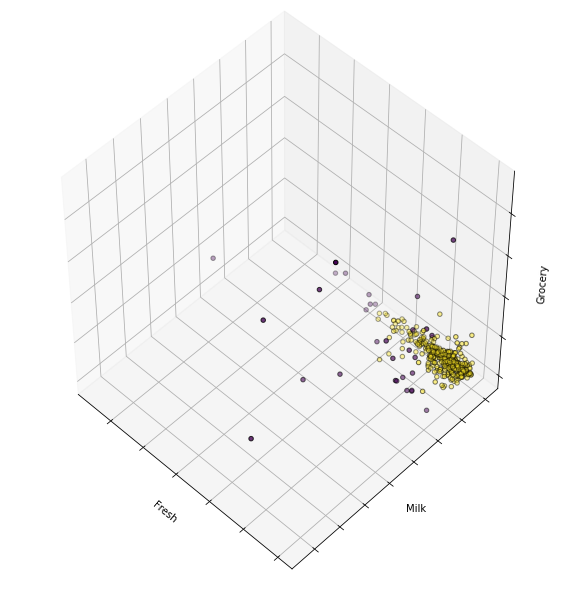

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(df.Fresh, df.Milk, df.Grocery,
           c=df.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Grocery')

Experiment with the DBSCAN properties
Read up on the epsilon and min_samples arguments into DBSCAN at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
Experiment with altering the epsilon values (the eps argument holding the threshhold parameter). Run the models and visualize the results. What has changed? Why do you think that is?
Double the min_samples parameter. Run your model and visualize the results. Consider what changed and why.

In [27]:
dbsc = DBSCAN(eps = .6, min_samples = 50).fit(np_array)


In [28]:
# extract labels
labels2 = dbsc.labels_
labels[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
df['labels2'] = labels2
df.labels2.value_counts()

 0    439
-1      1
Name: labels2, dtype: int64

Text(0.5, 0, 'Grocery')

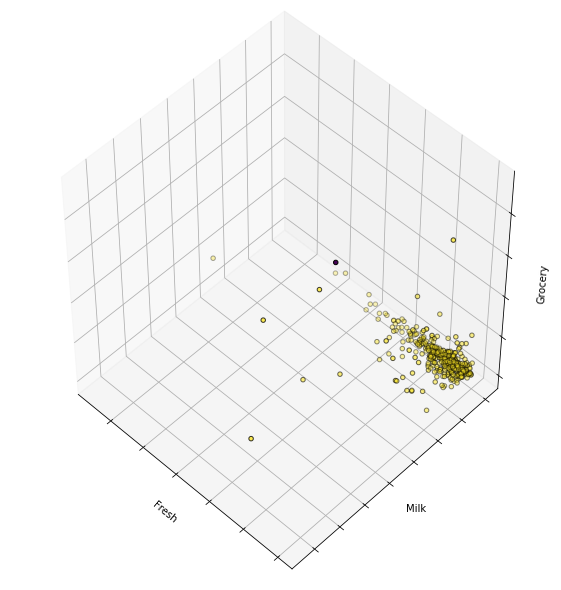

In [30]:
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(df.Fresh, df.Milk, df.Grocery,
           c=df.labels2, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Grocery')